In [1]:
#enveloping potential
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import os, sys as csys
os.getcwd()
csys.path.append(os.getcwd()+"/../..")
import matplotlib.pyplot as plt
import math
import numpy as np

from Ensembler.src.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator
from Ensembler.src.integrator import positionVerletIntegrator, leapFrogIntegrator
from Ensembler.src.system import system
import Ensembler.src.potentials.ND as pot
import Ensembler.src.potentials.TwoD as pot2D
import Ensembler.visualisation.plotPotentials as exPlot
%matplotlib inline
from Ensembler.src.conditions.periodicBoundaryCondition import periodicBoundaryCondition 



In [2]:
#Sdependent sampling vis
def plot_s_dependent_sim(s_val_posDict, traj ,out_tmp_dir:str):
        ##positions
    resolution = 360
    x = np.linspace(-180, 180, resolution)
    y = x
    positions = [(x_t,y_t) for x_t in x for y_t in y]
    
    print("calc tot space")
    energies1 = V1.ene(positions)
    energies2 = V2.ene(positions)

    #plot data
    print("map data")
    energies1Map = [[row for row in energies1[x:x+resolution]] for x in range(0,len(energies1), resolution)]
    energies2Map = [[row for row in energies2[x:x+resolution]] for x in range(0,len(energies2), resolution)]

    print("plot")   
    fig, axes = plt.subplots(nrows=len(values), ncols=3, figsize=[15,15])        
    for s, (ax1, ax2, axR) in zip(s_val_posDict,axes):
        print(s)
        tmp_visit_x, tmp_visit_y = (s_val_posDict[s][0], s_val_posDict[s][1])
        #print(len(tmp_visit_x), len(tmp_visit_y))
        minV,maxV = min(energies1), max(energies1)    
        surf = ax1.imshow(energies1Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])
        surf = ax2.imshow(energies2Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

        edsPot.s = s
        energiesEds = edsPot.ene([positions, positions])
        #minV,maxV = min(energiesEds), max(energiesEds)
        energiesEdsMap = [[row for row in energiesEds[x:x+resolution]] for x in range(0,len(energiesEds), resolution)]
        surf = axR.imshow(energiesEdsMap, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

        ax1.scatter(tmp_visit_x, tmp_visit_y, c="orange", alpha=0.2, s=2)
        ax1.set_title("s="+str(s))
        ax2.scatter(tmp_visit_x, tmp_visit_y, c="orange", alpha=0.2, s=2)
        axR.scatter(tmp_visit_x, tmp_visit_y, c="orange", alpha=0.2, s=2)

    #    for s1, s2, sR in zip(visited_positions, visited_positions, visited_positions):
    fig.tight_layout()
    fig.show()     

    print("Saving")
    out_path = out_tmp_dir+"/s_dependent_sampling.png"
    print(out_path)
    fig.savefig(out_path)
    plt.close(fig)

    return out_path

print("done")

done


In [3]:
#Sdependent sampling vis
def plot_s_dependent_sim_relativeRBarr(s_val_posDict, traj ,out_tmp_dir:str):
        ##positions
    resolution = 360
    x = np.linspace(-180, 180, resolution)
    y = x
    positions = [(x_t,y_t) for x_t in x for y_t in y]
    print("calc tot space")
    energies1 = V1.ene(positions)
    energies2 = V2.ene(positions)

    #plot data
    print("map data")
    energies1Map = [[row for row in energies1[x:x+resolution]] for x in range(0,len(energies1), resolution)]
    energies2Map = [[row for row in energies2[x:x+resolution]] for x in range(0,len(energies2), resolution)]

    print("plot")   
    fig, axes = plt.subplots(nrows=len(values), ncols=3, figsize=[15,15])      
    first=True
    for s, (ax1, ax2, axR) in zip(s_val_posDict,axes):
        print(s)
        tmp_visit_x, tmp_visit_y = (s_val_posDict[s][0], s_val_posDict[s][1])

        minV,maxV = min(energies1), max(energies1)
        surf = ax1.imshow(energies1Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])
        surf = ax2.imshow(energies2Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

        edsPot.s = s
        energiesEds = edsPot.ene(positions)
                
        if(first):
            rel_diff = (max(energiesEds)-min(energiesEds))
            first=False
        minV,maxV = min(energiesEds), min(energiesEds)+rel_diff

        #minV,maxV = min(energiesEds), max(energiesEds)
        energiesEdsMap = [[row for row in energiesEds[x:x+resolution]] for x in range(0,len(energiesEds), resolution)]
        surf = axR.imshow(energiesEdsMap, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

        ax1.scatter(tmp_visit_x, tmp_visit_y, c="orange", alpha=0.2, s=2)
        ax1.set_title("s="+str(s))
        ax2.scatter(tmp_visit_x, tmp_visit_y, c="orange", alpha=0.2, s=2)
        axR.scatter(tmp_visit_x, tmp_visit_y, c="orange", alpha=0.2, s=2)

    #    for s1, s2, sR in zip(visited_positions, visited_positions, visited_positions):
    fig.tight_layout()
    fig.show()     

    print("Saving")
    out_path = out_tmp_dir+"/s_dependent_sampling_relBarrier.png"
    print(out_path)
    fig.savefig(out_path)
    plt.close(fig)

    return out_path

print("done")

done


In [5]:
#ENERGIES Sampling
def plot_energy_traj(s_val_pos_dict, out_tmp_dir):
    tmp_visit_x, tmp_visit_y = (s_val_pos_dict[100.0][0], s_val_pos_dict[100.0][1])
    state1 = V1.ene(list(zip(tmp_visit_x, tmp_visit_y)))
    state2 = V2.ene(list(zip(tmp_visit_x, tmp_visit_y)))
    edsPot.s = 1.0
    Vrenergies = edsPot.ene(list(zip(tmp_visit_x, tmp_visit_y)))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x=[t for t in range(len(Vrenergies))], y=Vrenergies, label="eds_pot", alpha= 0.1, s=1)
    ax.scatter(x=[t for t in range(len(state1))], y=state1, label="state1", alpha= 0.1, s=1)
    ax.scatter(x=[t for t in range(len(state2))], y=state2, label="state2", alpha= 0.1, s=1)
    ax.set_title("Sampled Energies")
    ax.set_ylabel("Potential")
    ax.set_xlabel("t")
    ax.legend()

    out_path = out_tmp_dir+"/sampled_energies_at_s100.png"
    print(out_path)
    fig.savefig(out_path)
    plt.close(fig)
    return out_path

In [6]:
#write out energy traj
def write_out_etraj(traj, out_tmp_dir, V1, V2):
    print("write OUT")
    visited_positions = np.array([x.position[0] for x in traj])
    state1 = V1.ene(visited_positions)
    state2 = V2.ene(visited_positions)
    Vrenergies = np.array([x.totPotEnergy for x in traj])

    out_path = out_tmp_dir+"/sampled_energies_at_s100.out"
    out_file = open(out_path, "w")
    i=1
    out_file.write(str("t")+"\t"+str("V1")+"\t"+str("V2")+"\t"+str("Vr")+"\n")

    for V1, V2, Vr in zip(state1, state2, Vrenergies):
        out_file.write(str(i)+"\t"+str(V1)+"\t"+str(V2)+"\t"+str(Vr)+"\n")
        i+=1

    out_file.close()
    return out_path

In [2]:
#run multiple replicas

import tempfile
tmp_dir = tempfile.gettempdir()+"/eds_simulation3"
if(not os.path.exists(tmp_dir)):
    os.mkdir(tmp_dir)
os.chdir(tmp_dir)

##settings
shift  = np.rad2deg(0.5*math.pi)
values = [100, 0.09, 0.04,  0.01, 0.005,0.001, 0.00001]
#Potentials
V1 = pot2D.wavePotential(phase_shift=(shift,shift), multiplicity=(2.0, 2.0), amplitude=(1.0, 1.0))
V2 = pot2D.wavePotential(phase_shift=(0.0, 0.0), multiplicity=(2.0, 2.0), amplitude=(1.0, 1.0))

edsPot = pot.envelopedPotential(V_is=[V1, V2], s=0.0000000001, Eoff_i=[-2,0])
edsPot._set_singlePos_mode()

replicas = 1#0
seq_repeat = 1
start=0
syst = None
for replica in range(start, replicas):
    print("rep: ", replica)
    replica_out = tmp_dir+"/replica_"+str(replica)
    if(not os.path.exists(replica_out)):
        os.mkdir(replica_out)
    pos = [[0.1,0.1],[0.1,0.1]]

    #Build System
    periodic_bound = periodicBoundaryCondition(boundary=[[-180,180], [-180,180]])
    integrator = metropolisMonteCarloIntegrator() 
    sys=system(potential=edsPot, integrator=integrator, conditions=[periodic_bound], position=pos)
    del sys.trajectory[:]

    #Simulation Setup
    each_sim = 500#400
    svals = values+list(reversed(values))
    s_val_posDict = {}

    for s in svals*seq_repeat:
        sys.potential.s = s
        cur_state = sys.simulate(each_sim, withdrawTraj=False)
        tmpTraj = sys.trajectory[-each_sim:]
        
        if(s not in s_val_posDict):
            s_val_posDict.update({s: [list([frame.position[0][0] for frame in tmpTraj]), 
                                      list([frame.position[0][1] for frame in tmpTraj])]})
        else:
            s_val_posDict[s][0].extend(list([frame.position[0][0] for frame in tmpTraj]))
            s_val_posDict[s][1].extend(list([frame.position[0][1] for frame in tmpTraj]))
        #print(s, start_ind, end_ind)
    del integrator, periodic_bound
    
    traj = sys.getTrajectory()
    del syst
print("done")

rep:  0
done


In [33]:
traj.head()
traj.shape


(7000, 7)

calc tot space
map data
plot
[list([[2.3505298626653945, -4.061779311592504], [2.3505298626653945, -4.061779311592504]])]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Done
Saving


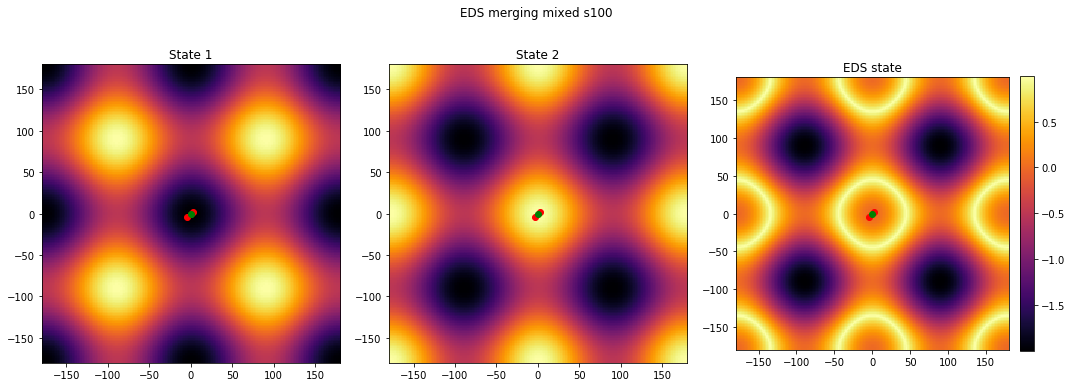

In [3]:
##positions
resolution = 180
x = np.linspace(start=-180, stop=180, num=resolution)
y = x
positions = np.array([(x_t,y_t) for x_t in x for y_t in y])

#calc energies for total space
print("calc tot space")
edsPot._set_multiPos_mode()
edsPot._set_type_check()

energies1 = V1.ene(positions)
energies2 = V2.ene(positions)
energiesEds = edsPot.ene(list(zip(positions, positions)))

#plot data
print("map data")
energies1Map = [[row for row in energies1[x:x+resolution]] for x in range(0,len(energies1), resolution)]
energies2Map = [[row for row in energies2[x:x+resolution]] for x in range(0,len(energies2), resolution)]
energiesEdsMap = [[row for row in energiesEds[x:x+resolution]] for x in range(0,len(energiesEds), resolution)]

#calc E for visited positions
visited_positions = traj.position

print("plot")
#plotting
minV,maxV = min(energies1), max(energies1)
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15,6])
surf = ax1.imshow(energies1Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])
surf = ax2.imshow(energies2Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

minV,maxV = min(energiesEds), max(energiesEds)
surf = ax3.imshow(energiesEdsMap, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

ax1.set_title("State 1")
ax2.set_title("State 2")
ax3.set_title("EDS state")
fig1.suptitle("EDS merging mixed s"+str(edsPot.s))
fig1.colorbar(surf,fraction=0.046, pad=0.04)

#out_path = out_tmp_dir+"/SimSpace.png"
#print(out_path)
#fig1.savefig(out_path)
ax1.scatter(visited_positions[:][0][0], visited_positions[:][0][1], c="orange", alpha=0.2)
ax2.scatter(visited_positions[:][0][0], visited_positions[:][0][1], c="orange", alpha=0.2)
ax3.scatter(visited_positions[:][0][0], visited_positions[:][0][1], c="orange", alpha=0.2)

print(visited_positions.tail(1).values)
ax1.scatter(visited_positions.tail(1).values[0][0], visited_positions.tail(1).values[0][1], c="r")
ax2.scatter(visited_positions.tail(1).values[0][0], visited_positions.tail(1).values[0][1], c="r")
ax3.scatter(visited_positions.tail(1).values[0][0], visited_positions.tail(1).values[0][1], c="r")

ax1.scatter(visited_positions[0][0][0], visited_positions[0][0][0], c="g")
ax2.scatter(visited_positions[0][0][0], visited_positions[0][0][0], c="g")
ax3.scatter(visited_positions[0][0][0], visited_positions[0][0][0], c="g")


fig1.tight_layout()
fig1.show()
print("Done")

print("Saving")
#out_path = out_tmp_dir+"/totSim.png"
#print(out_path)
#fig1.savefig(out_path)
#plt.close(fig1)

In [18]:
print(V1.ene([90,90]))
V1.phase_shift = (math.pi*0.5,math.pi*0.5)
print(V1.ene([90,90]))
print(V2.ene([90,90]))

-2.0
2.0
-2.0


calc tot space
map data
plot


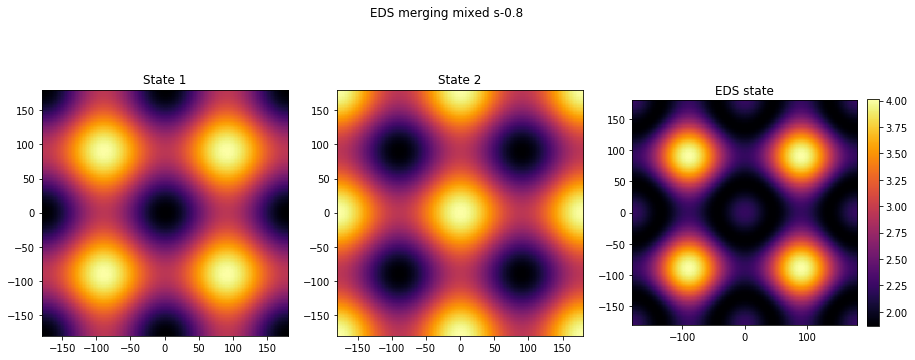

In [9]:
##positions
resolution = 180
x = np.linspace(start=-180, stop=180, num=resolution)
y = x
positions = np.array([(x_t,y_t) for x_t in x for y_t in y])
edsPot.s = -0.8
#calc energies for total space
print("calc tot space")
edsPot._set_multiPos_mode()
edsPot._set_type_check()

energies1 = V1.ene(positions)
energies2 = V2.ene(positions)
energiesEds = list(edsPot.ene(list(zip(positions, positions))).flat)

#plot data
print("map data")
energies1Map = [[row for row in energies1[x:x+resolution]] for x in range(0,len(energies1), resolution)]
energies2Map = [[row for row in energies2[x:x+resolution]] for x in range(0,len(energies2), resolution)]
energiesEdsMap = [[row for row in energiesEds[x:x+resolution]] for x in range(0,len(energiesEds), resolution)]

#calc E for visited positions
visited_positions = traj.position

print("plot")
#plotting
minV,maxV = min(energies1), max(energies1)
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15,6])
surf = ax1.imshow(energies1Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])
surf = ax2.imshow(energies2Map, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

minV,maxV = min(energiesEds), max(energiesEds)
surf = ax3.imshow(energiesEdsMap, cmap="inferno", interpolation="nearest", origin='center', vmax=maxV, vmin=minV, extent=[min(x), max(x), min(y), max(y)])

ax1.set_title("State 1")
ax2.set_title("State 2")
ax3.set_title("EDS state")
fig1.suptitle("EDS merging mixed s"+str(edsPot.s))
fig1.colorbar(surf,fraction=0.046, pad=0.04)

In [11]:
 list(edsPot.ene(list(zip(positions, positions))).flat)

[693148.1805604453,
 693148.1805604429,
 693148.1805604355,
 693148.1805604234,
 693148.180560407,
 693148.1805603862,
 693148.1805603618,
 693148.1805603339,
 693148.1805603035,
 693148.180560271,
 693148.1805602369,
 693148.1805602019,
 693148.180560167,
 693148.1805601324,
 693148.1805600992,
 693148.1805600678,
 693148.180560039,
 693148.1805600133,
 693148.1805599912,
 693148.1805599729,
 693148.1805599589,
 693148.18055995,
 693148.1805599456,
 693148.1805599463,
 693148.1805599518,
 693148.1805599622,
 693148.1805599771,
 693148.1805599962,
 693148.1805600193,
 693148.1805600459,
 693148.1805600753,
 693148.1805601073,
 693148.1805601409,
 693148.1805601756,
 693148.1805602106,
 693148.1805602455,
 693148.1805602792,
 693148.1805603113,
 693148.1805603411,
 693148.1805603682,
 693148.1805603917,
 693148.1805604115,
 693148.1805604268,
 693148.1805604378,
 693148.1805604438,
 693148.1805604452,
 693148.1805604415,
 693148.180560433,
 693148.1805604198,
 693148.1805604022,
 693148